# Import packages

In [3]:
import numpy as np
import pylab as pl

from particle_tracking import Tracking, Linker, Filtering
from particle_tracking.src import menus, utils


# Main tracking menu

- Use ``Media Input`` to select your input data type (images or movie)
- ``Tracking Mode`` allows reading a single or multiple frames. If ``single`` mode is selected, ``which_single`` frame must be specified
- ``Diameter`` is the approx size of the particles in px
- ``LP filter`` is a value used to low pass filter the images
- ``BG avg`` is a value for the average background pixel intensity (works well if keep around same value of ``diameter``)
- ``Masscut`` used to adjust the particle detection size
- ``Min bright`` threshold value to detect particles
- ``Edge cut`` allows cutting n border pixels from the input frames

In [3]:
# First declare the directory containing the input data
directory = ('/.../particle_tracking/test/')
filename = ('t_') #images should have a prefix, i.e. t_ and a 0000i format where i is the frame number

In [4]:
main_menu = menus.MainMenu()
main_menu.options

In [5]:
params = menus.return_params(main_menu.options.children)
params['directory'] = directory #add directory
params['filename'] = filename #and filename to params

In [22]:
# print(params) #print to verify params

0it [00:00, ?it/s]

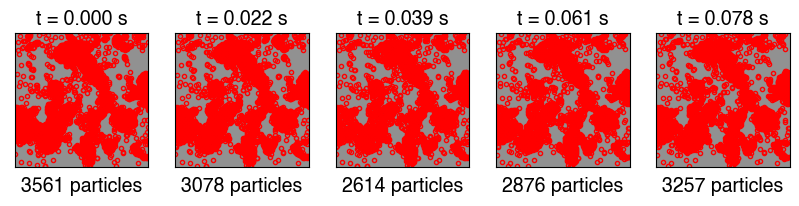

In [6]:
particles = Tracking(params).tracking()

In [7]:
print(particles.keys()) #each key value represents the frame number

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


## Save the coordinates

In [26]:
utils.saving(directory,particles,format='pickle',filename='particles')

data directory has been created


# Get trajectories and filter stuck particles

Frame 14: 3257 trajectories present.


  0%|          | 0/9173 [00:00<?, ?it/s]

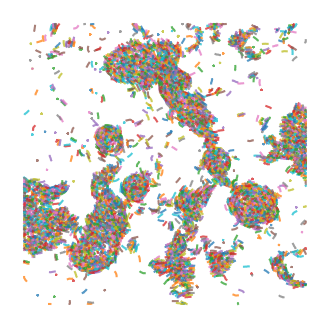

In [8]:
tframes, trajs = Linker(data=particles,max_disp=0.5,params=params).link()

## Filter trajectories

  0%|          | 0/9173 [00:00<?, ?it/s]

2667 trajectories removed


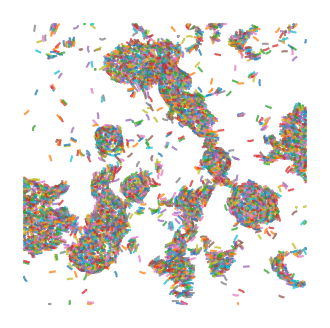

In [10]:
fframes, ftrajs = Filtering(data=tframes,params=params,cutoff=0.1).filter()

In [11]:
utils.saving(directory,fframes,format='pickle',filename='fframes')
utils.saving(directory,ftrajs,format='pickle',filename='ftrajs')